#  **Uncovering the DNA of F1 Car Performance with PCA**

## 🚀 Why This Task Matters

Formula 1 is **ultra-competitive**. Every **millisecond** counts and can mean the difference between **victory and defeat**. Each F1 constructor—like **Red Bull**, **Ferrari**, or **Mercedes**—designs their cars with different priorities:

* 🌀 **Aerodynamics** for superior cornering
* ⚡ **Horsepower** for raw straight-line speed
* ⚖️ **Balanced designs** that try to optimize both

But here's the problem...

## 🧩 The Challenge

F1 cars have **many technical specifications**:

> Horsepower, engine displacement, weight, downforce, acceleration, top speed, fuel economy, R\&D cost...

This is **high-dimensional data**—and it's hard to interpret all at once. You **can’t simply look at 10+ features** and immediately understand which cars perform similarly or what traits define different performance types.

---

## 🎯 Objective

✅ **Implement PCA from scratch** (no `sklearn`, no prebuilt PCA libraries)
✅ **Reduce dimensionality** while preserving the essential patterns
✅ **Identify performance archetypes** (e.g., cars that prioritize power vs. those that focus on handling)

---

## 💡 Why It Matters to the Team

Your PCA analysis will help the F1 engineering team:

* 🔍 Understand which design strategies are most effective
* 🆚 See how different cars compare across seasons or teams
* 🎯 Decide what areas to focus on in next year’s car development

Ready to dive into the numbers and uncover the **DNA of performance**? Let’s go.

---

### `Imports`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### `load data`

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(), "dataset", "CARS_1.csv"))
df.head(10)

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500
5,Toyota Fortuner,99,Diesel,2755,4,7.0,Automatic,80.0,SUV,4.5,3240000,4957000,500.0,2800,201.15,3400
6,Hyundai Creta,731,Diesel,1493,4,5.0,Automatic,50.0,SUV,4.5,1044000,1818000,250.0,2750,113.45,4000
7,Tata Punch,381,Petrol,1199,3,5.0,Automatic,37.0,SUV,4.5,593000,949000,113.0,3400,84.48,6000
8,Mahindra Bolero,107,Diesel,1498,3,7.0,Manual,60.0,SUV,4.5,933000,1026000,210.0,2200,74.96,3600
9,Maruti Swift,205,Petrol,1197,4,5.0,Automatic,37.0,Hatchback,4.0,592000,885000,113.0,4400,88.50,6000


### `quick EDA`

In [3]:
df.shape

(203, 16)

In [4]:
df.columns

Index(['car_name', 'reviews_count', 'fuel_type', 'engine_displacement',
       'no_cylinder', 'seating_capacity', 'transmission_type',
       'fuel_tank_capacity', 'body_type', 'rating', 'starting_price',
       'ending_price', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp',
       'max_power_rp'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             203 non-null    object 
 1   reviews_count        203 non-null    int64  
 2   fuel_type            203 non-null    object 
 3   engine_displacement  203 non-null    int64  
 4   no_cylinder          203 non-null    int64  
 5   seating_capacity     202 non-null    float64
 6   transmission_type    203 non-null    object 
 7   fuel_tank_capacity   203 non-null    float64
 8   body_type            203 non-null    object 
 9   rating               203 non-null    float64
 10  starting_price       203 non-null    int64  
 11  ending_price         203 non-null    int64  
 12  max_torque_nm        203 non-null    float64
 13  max_torque_rpm       203 non-null    int64  
 14  max_power_bhp        203 non-null    float64
 15  max_power_rp         203 non-null    int

In [6]:
df['fuel_type'].unique()


array(['Petrol', 'Diesel', 'CNG', 'Electric'], dtype=object)

In [7]:
df['body_type'].unique()

array(['Hatchback', 'SUV', 'MUV', 'Sedan', 'Hybrid', 'Minivan',
       'Pickup Truck', 'Coupe', 'Convertible', 'Luxury', 'Wagon'],
      dtype=object)

---

### `prepare data`

In [8]:
X = df.drop(columns=['body_type'])
y = df['body_type']
X_numeric = X.select_dtypes(include=[np.number])

In [9]:
X_numeric.head(10)

,reviews_count,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,51,998,3,5.0,27.0,4.5,399000,583000,89.0,3500,65.71,5500
1,86,1462,4,5.0,48.0,4.5,799000,1396000,136.8,4400,101.65,6000
2,242,2184,4,4.0,57.0,4.5,1353000,1603000,300.0,2800,130.00,3750
3,313,2198,4,7.0,60.0,4.5,1318000,2458000,450.0,2800,182.38,3500
4,107,2198,4,7.0,57.0,4.5,1199000,2390000,400.0,2750,172.45,3500
5,99,2755,4,7.0,80.0,4.5,3240000,4957000,500.0,2800,201.15,3400
6,731,1493,4,5.0,50.0,4.5,1044000,1818000,250.0,2750,113.45,4000
7,381,1199,3,5.0,37.0,4.5,593000,949000,113.0,3400,84.48,6000
8,107,1498,3,7.0,60.0,4.5,933000,1026000,210.0,2200,74.96,3600
9,205,1197,4,5.0,37.0,4.0,592000,885000,113.0,4400,88.50,6000


In [10]:
# drop unrelevant to preformance columns
X_numeric.drop(columns=["seating_capacity", "reviews_count"], inplace=True)

In [11]:
# Create average_price column
X_numeric['average_price'] = (X_numeric['starting_price'] + X_numeric['ending_price']) / 2

# Drop the original price columns
X_numeric.drop(['starting_price', 'ending_price'], axis=1, inplace=True)

In [12]:
X_numeric.head(10)

,engine_displacement,no_cylinder,fuel_tank_capacity,rating,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,average_price
0,998,3,27.0,4.5,89.0,3500,65.71,5500,491000.0
1,1462,4,48.0,4.5,136.8,4400,101.65,6000,1097500.0
2,2184,4,57.0,4.5,300.0,2800,130.00,3750,1478000.0
3,2198,4,60.0,4.5,450.0,2800,182.38,3500,1888000.0
4,2198,4,57.0,4.5,400.0,2750,172.45,3500,1794500.0
5,2755,4,80.0,4.5,500.0,2800,201.15,3400,4098500.0
6,1493,4,50.0,4.5,250.0,2750,113.45,4000,1431000.0
7,1199,3,37.0,4.5,113.0,3400,84.48,6000,771000.0
8,1498,3,60.0,4.5,210.0,2200,74.96,3600,979500.0
9,1197,4,37.0,4.0,113.0,4400,88.50,6000,738500.0


In [13]:
X_numeric.shape

(203, 9)

In [14]:
# check for missing values
X_numeric.isna().sum()

engine_displacement    0
no_cylinder            0
fuel_tank_capacity     0
rating                 0
max_torque_nm          0
max_torque_rpm         0
max_power_bhp          0
max_power_rp           0
average_price          0
dtype: int64

In [15]:
# convert to numpy array
X_np = X_numeric.to_numpy()

In [16]:
# standardization, as PCA is sensitive to feature scales
X_std = (X_np - X_np.mean(axis=0)) / X_np.std(axis=0)    

In [17]:
X_std.shape

(203, 9)

In [18]:
# Covariance Matrix
cov_matrix = np.cov(X_std.T)

In [19]:
# Eigen Decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [20]:
# Sort Eigenvalues & Eigenvectors
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals_sorted = eig_vals[sorted_indices]
eig_vecs_sorted = eig_vecs[:, sorted_indices]

In [21]:
W = eig_vecs_sorted[:, :2]     # Projection matrix: 9 x 2 (first 2 principal components)
X_pca = X_std @ W            

In [22]:
X_pca.shape

(203, 2)

In [23]:
car_classes = df.loc[X_numeric.index, 'body_type'].values

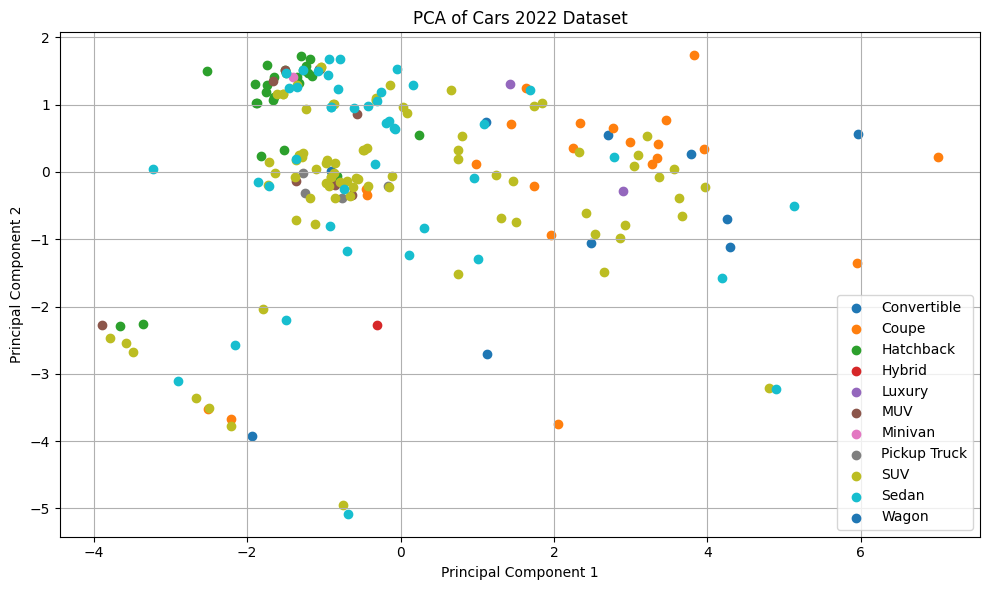

In [ ]:
plt.figure(figsize=(10, 6))
for label in np.unique(car_classes):
    mask = car_classes == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Cars 2022 Dataset')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
explained_var_ratio = eig_vals_sorted / np.sum(eig_vals_sorted)
print("Explained Variance (Top 2 PCs):", explained_var_ratio[:2])

Explained Variance (Top 2 PCs): [0.47693334 0.20967795]


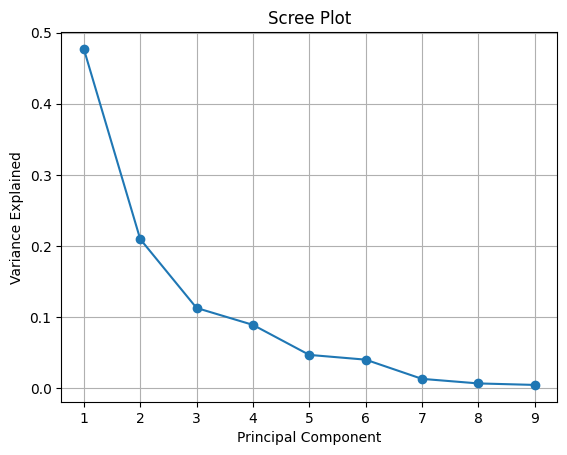

In [26]:
plt.plot(np.arange(1, len(eig_vals_sorted)+1), explained_var_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

### 🎯 Explained Variance (Top 2 Principal Components)

- **PC1** explains approximately **47.7%** of the total variance.
- **PC2** explains approximately **20.9%** of the total variance.

✅ **Total Variance Retained by Top 2 PCs**:
\[
47.7\% + 20.9\% = **68.6\%**
\]

This means that our **2D PCA projection retains about 68.6% of the original information** from the 9-dimensional feature space. This level of variance retention is **quite good for visualization and interpretation**, allowing us to explore key performance patterns across cars with minimal loss of information.


---

## `Bonus`

In [27]:
# 1. Transpose the matrix
def transpose(matrix):
    return [[row[i] for row in matrix] for i in range(len(matrix[0]))]

In [28]:
# 2. Matrix Multiplication (Dot Product)
def matmul(A, B):
    result = [[0] * len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

In [29]:
# 3. Standardize the Data (Z-score normalization)
def standardize(matrix):
    transposed = transpose(matrix)
    standardized = []

    for col in transposed:
        mean = sum(col) / len(col)
        std = (sum((x - mean) ** 2 for x in col) / len(col)) ** 0.5
        if std == 0: std = 1e-8  # avoid division by zero
        standardized.append([(x - mean) / std for x in col])

    return transpose(standardized)

In [30]:
# 4. Covariance Matrix
def covariance_matrix(X):
    n = len(X)
    XT = transpose(X)
    cov = matmul(XT, X)
    return [[val / (n - 1) for val in row] for row in cov]

In [31]:
# 5. Eigen Decomposition
def eigen_decompose(cov_matrix):
    cov_np = np.array(cov_matrix)
    eig_vals, eig_vecs = np.linalg.eig(cov_np)
    return eig_vals, eig_vecs

In [32]:
# project data onto the first two principal components
def project_data(X, eig_vecs, n_components=2):
    eig_vecs_T = transpose(eig_vecs)   #  (n_components x features)
    return matmul(X, eig_vecs_T)     

### **Benchmarking Execution Time**

In [33]:
import time

def time_it(func):
    start = time.time()
    result = func()
    end = time.time()
    print(f"Time: {end - start:.4f} seconds")
    return result

### **Full Pipeline**

In [34]:
def run_python_pca(data, n_components=2):
    
    standardized = standardize(data)  # list of lists

    cov = covariance_matrix(standardized)  # list of lists

    eig_vals, eig_vecs = eigen_decompose(cov)  # NumPy

    sorted_indices = np.argsort(eig_vals)[::-1]

    top_vectors = eig_vecs[:, sorted_indices[:n_components]]  
    top_vectors_py = top_vectors.T.tolist()  
    
    projected = project_data(standardized, top_vectors_py)
    
    return projected

In [35]:
# compact version of PCA using NumPy (we did before above)
def run_numpy_pca(X, n_components=2):
    # Step 1: Standardize the data (Z-score normalization)
    X = np.array(X)
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    X_std[X_std == 0] = 1  # Prevent division by zero
    standardized = (X - X_mean) / X_std

    # Step 2: Compute the covariance matrix
    cov_matrix = np.cov(standardized, rowvar=False)

    # Step 3: Eigen decomposition
    eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

    # Step 4: Sort eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eig_vals)[::-1]
    top_vectors = eig_vecs[:, sorted_indices[:n_components]]

    # Step 5: Project the data onto top principal components
    projected = standardized @ top_vectors

    return projected


In [36]:
# Prepare input for both versions
X_py = X_numeric.values.tolist()
X_np = X_numeric.to_numpy()

# Run PCA using pure Python implementation
manual_result = time_it(lambda: run_python_pca(X_py))  # expects list of lists

# Run PCA using NumPy implementation
numpy_result = time_it(lambda: run_numpy_pca(X_np))  # expects NumPy array


Time: 0.0052 seconds
Time: 0.0000 seconds


In [39]:
# Validate similarity of results using cosine similarit
from sklearn.metrics.pairwise import cosine_similarity

def are_projections_close(A, B, tol=0.4):
    A, B = np.array(A), np.array(B)
    sim = cosine_similarity(A, B)
    avg_similarity = np.mean(np.abs(sim.diagonal()))
    return avg_similarity >= 1 - tol

print("Do both methods give similar results?", are_projections_close(manual_result, numpy_result))


Do both methods give similar results? True
